In [1]:
from prolint2 import Universe

/Users/danielramirez/mambaforge/envs/prolint2/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from prolint2.sampledata import GIRKDataSample
GIRK = GIRKDataSample()
u = Universe(GIRK.coordinates, GIRK.trajectory)

In [3]:
contacts = u.compute_contacts(cutoff=7)

100%|██████████| 1251/1251 [00:02<00:00, 446.31it/s]


In [4]:
u.query.residues.resids

array([   1,    2,    3, ..., 1282, 1283, 1284])

In [5]:
from prolint2.metrics.metrics import Metric, MeanMetric, SumMetric, MaxMetric

mean_instance = MeanMetric()
metric_instance = Metric(contacts, mean_instance)
mean_contacts = metric_instance.compute()

#### Point distributions

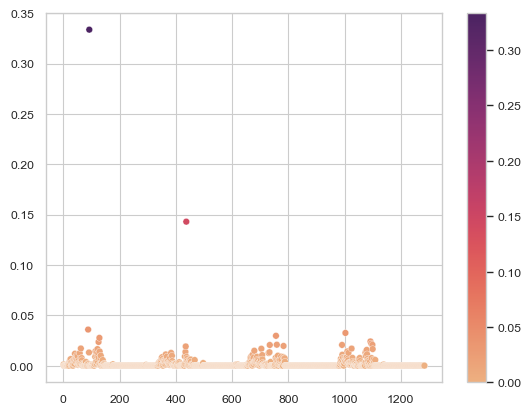

In [6]:
from prolint2.plotting.plotting import PointDistribution
PD = PointDistribution(u, mean_contacts, lipid='CHOL', metric_name='MeanMetric')
PD.save_plot()

In [7]:
PD.generate_script(PointDistribution, "point_distribution.py")

#### Radar Plot

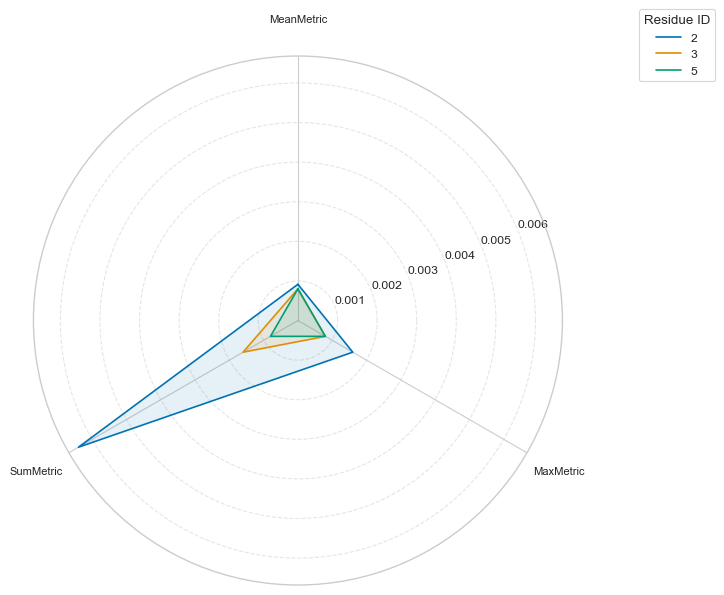

In [8]:
from prolint2.plotting.plotting import Radar
metric_instances_list = [MeanMetric(), SumMetric(), MaxMetric()]
metric_instance = Metric(contacts, metric_instances_list) # clear is True by default so we clear any existing metrics
contacts_out = metric_instance.compute() # populate the metric columns

RAD = Radar(contacts_out, resIDs=[2, 3, 5], lipid='POPS', metric_names=['MeanMetric', 'SumMetric', 'MaxMetric'])
RAD.save_plot()

In [9]:
RAD.generate_script(Radar, "radar.py")

#### Density map

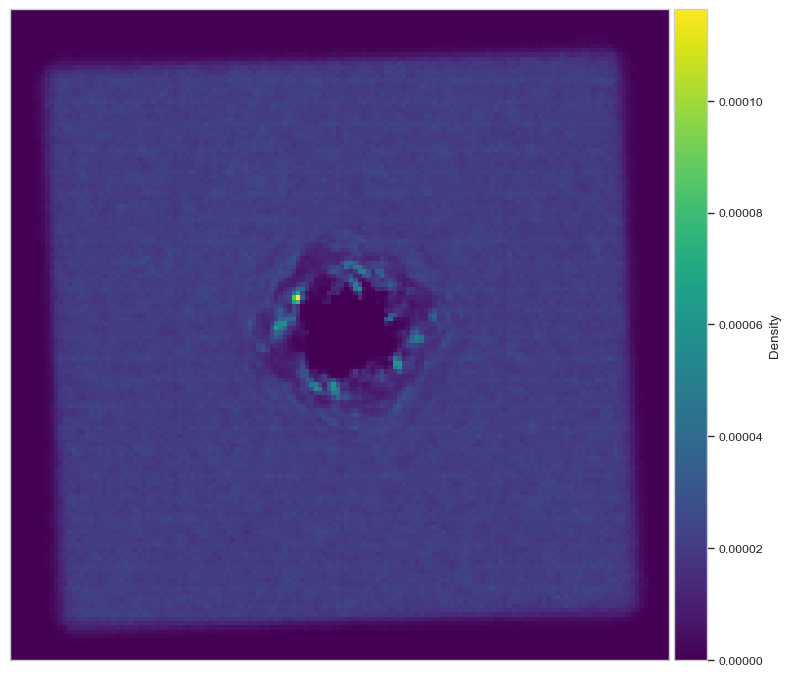

In [10]:
from prolint2.plotting.plotting import DensityMap

Dens = DensityMap(u, lipid='CHOL')
Dens.save_plot(show=False)

In [11]:
Dens.generate_script(DensityMap, 'plot_2d.py')